In [2]:
import pandas as pd
import torch
import scipy
import numpy as np
import scanpy as sc
import h5py
import pickle

import pylab as plt
import seaborn as sns
sns.set_context('paper')

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
fn_bin_strategy = './data/fig_bin_strategy.csv'
df_bin_strategy = pd.read_csv(fn_bin_strategy)
df_bin_strategy

,Bin strategy,ARI,NMI,HOMO,CP,SIL
0,Auto discretization,0.7767,0.7810,0.7841,0.7778,0.1406
1,Round bin (w/ 0),0.6177,0.6838,0.6976,0.6704,0.1306
2,Up bin (wo/ 0),0.5882,0.6515,0.6590,0.6442,0.1198
3,Equal bin,0.4895,0.6741,0.7499,0.6121,0.1229


In [4]:
df_bin_strategy2 = pd.melt(df_bin_strategy, id_vars=['Bin strategy'], 
                         value_vars=['ARI', 'NMI', 'HOMO', 'CP', 'SIL'], 
                         var_name='Metric', value_name='Value')
df_bin_strategy2

,Bin strategy,Metric,Value
0,Auto discretization,ARI,0.7767
1,Round bin (w/ 0),ARI,0.6177
2,Up bin (wo/ 0),ARI,0.5882
3,Equal bin,ARI,0.4895
4,Auto discretization,NMI,0.7810
5,Round bin (w/ 0),NMI,0.6838
6,Up bin (wo/ 0),NMI,0.6515
7,Equal bin,NMI,0.6741
8,Auto discretization,HOMO,0.7841
9,Round bin (w/ 0),HOMO,0.6976


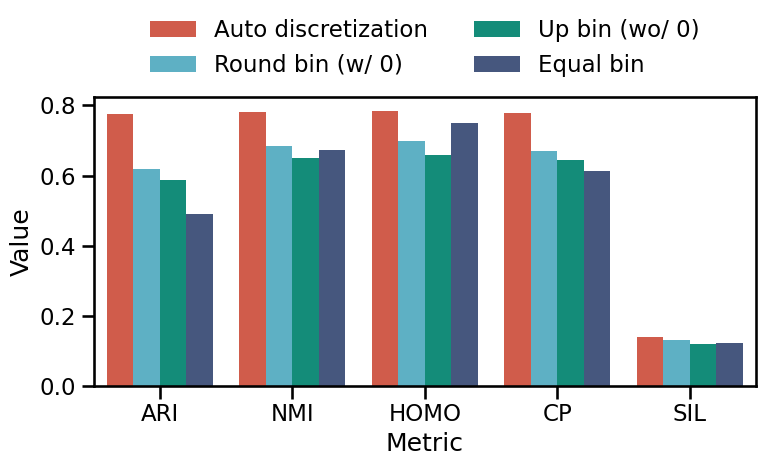

In [5]:
sns.set_context('talk')

colors = ['#E64B35','#4DBBD5','#00A087','#3C5488']
sns.set_palette(sns.color_palette(colors))

fig,ax=plt.subplots(figsize=(8,5))

sns.barplot(x='Metric', y='Value', hue='Bin strategy', data=df_bin_strategy2, ax=ax)

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)


plt.tight_layout()
plt.savefig(fn_bin_strategy+'.pdf')

In [5]:
fn_regress_vs_class = './data/fig_regress_vs_class.csv'
df_regress_vs_class = pd.read_csv(fn_regress_vs_class)
df_regress_vs_class

,Task type,ARI,NMI,HOMO,CP,SIL
0,Regression,0.7767,0.7810,0.7841,0.7778,0.1406
1,Classfication,0.4549,0.5524,0.5576,0.5576,0.0644


In [6]:
df_regress_vs_class2 = pd.melt(df_regress_vs_class, id_vars=['Task type'], 
                         value_vars=['ARI', 'NMI', 'HOMO', 'CP', 'SIL'], 
                         var_name='Metric', value_name='Value')
df_regress_vs_class2

,Task type,Metric,Value
0,Regression,ARI,0.7767
1,Classfication,ARI,0.4549
2,Regression,NMI,0.7810
3,Classfication,NMI,0.5524
4,Regression,HOMO,0.7841
5,Classfication,HOMO,0.5576
6,Regression,CP,0.7778
7,Classfication,CP,0.5576
8,Regression,SIL,0.1406
9,Classfication,SIL,0.0644


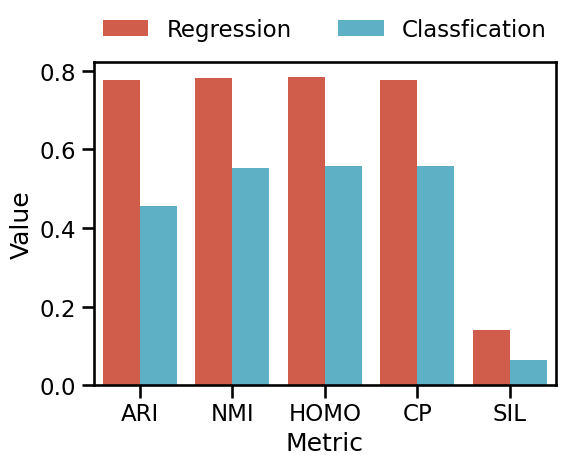

In [7]:
sns.set_context('talk')

fig,ax=plt.subplots(figsize=(6,5))

sns.barplot(x='Metric', y='Value', hue='Task type', data=df_regress_vs_class2, ax=ax)

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)


plt.tight_layout()
plt.savefig(fn_regress_vs_class+'.pdf')